## Task 1: Unexpected Plots
For this task we are going to be using matplotlib which is a visualisation library havely documented [here](https://matplotlib.org/stable/index.html), along with common python data structures including Lists, Arrays and tuples, loops including for loop, while loop and conditional statements. On the first few cells we explore algorithmic logic as described on the [assignment doc](https://docs.google.com/document/d/1ZUltBJgPx2d3Y3QC44xoibZJFCpNo2mIR9KZkpnLdv8/edit?usp=sharing) leading to the final function.

### Coding Environment
Lets import required libraries. By default most of the libraries we are going to use are pre-installed with python however if matplotlib is not installed, please uncomment the cell below and run to install it.

In [7]:
# requirements

# !pip install --upgrade matplotlib==3.2.2
# !pip install --upgrade numpy==1.19.5

In [8]:
# import required libraries
import numpy as np # for array manipulation
import random # for random choices
import matplotlib.pyplot as plt # for visualisation
from matplotlib.patches import RegularPolygon as RP

# suppress scientific notations for easier redability of floating values
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:16.3f}'.format})

### Regular Polygon



> We start by working on code that satisfy the following:
1.   creating a regular hexagon
2.   Pick a random point, P, inside the hexagon. 
3.   Make a triangle, T, by randomly connecting P to two adjacent vertices of the hexagon.
4.   Compute the centroid of T.
then we plot them. we get a hexagon and triangle adjacent to one of the sides choosen at random. we also mark the centroid.

Each time we run the cell location of the triangle and centroid changes with respect to random P within the hexagon.



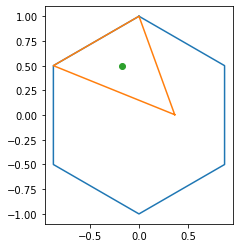

In [9]:
# Generate a Regular Hexagon
regular_hex = RP((0,0),6,1)

# Get the path of the hexagon generated above.
path = regular_hex.get_path()

# Get the list of path vertices.
vertices = path.vertices

# Get x and y values from vertices.
xs, ys = zip(*vertices) 

# Pair adjacent vertices anti-clockwise.
possible_adj_pairs = [(i, j) for i, j in zip(vertices[:-1], vertices[1:])]

# Get random pair of adjacent vertices
get_adj_pair = random.choice(possible_adj_pairs)

# Generate a random value of P and check if it lies within the hexagon
hex_has_point = False
while hex_has_point == False:
  P_size = (1, 2)
  P = np.random.uniform(-1, 1, P_size) # for efficiency limit generated values to xlim,ylim
  hex_has_point = path.contains_points(P)

# Create triangle T based on point P and random pair of adjacent vertices
T = [P[0],get_adj_pair[0],get_adj_pair[1],P[0]]
tri_xs, tri_ys = zip(*T)

# Compute centroid of triangle T
x_cent = (T[0][0] + T[1][0] + T[2][0])/3
y_cent = (T[0][1] + T[1][1] + T[2][1])/3
centroid = np.array([x_cent,y_cent])

# Generate hexgon showing triangle T and its centroid.
plt.figure()
plt.plot(xs,ys)
plt.plot(tri_xs, tri_ys)
plt.plot(x_cent, y_cent , marker='o')
plt.axis('scaled')
plt.show()